In [1]:
import numpy as np

from ctypes import c_long

from qiskit_qec.geometry.model.qubit_count import QubitCount
from qiskit_qec.geometry.model.qubit_data import QubitData

from qiskit_qec.geometry.tiles.RSSC import RSSC
from qiskit_qec.geometry.shape import Shape
from qiskit_qec.geometry.plane import Plane
from qiskit_qec.geometry.lattice import Lattice
from qiskit_qec.geometry.tiles.tiling import Tiling
from qiskit_qec.geometry.model.shell import Shell
from qiskit_qec.geometry.model.face import Face
from qiskit_qec.geometry.model.wireframe import WireFrame
from qiskit_qec.geometry.model.edge import Edge

In [2]:
def make_code(d, manifold):
    # Set parameters for RSSC code on the plane

    # Create the bounding or cutter shape
    cutter = Shape.square(origin=(0,-1), direction=(1,1), scale=d-1, manifold=manifold, dtype=int)
    print(f"Cutter points are: {cutter.points}")
    print(f"Cutter lines are: {cutter.lines}")

    # Set up the qubit counter and aux data structures
    qubit_count = QubitCount()
    qubit_data = QubitData()

    # Choose a tile

    tile = RSSC

    # Basis for Tiling or get from Tile directly
    u = np.array([2,0])
    v = np.array([0,2])

    # Create Tiling lattice
    lattice = Lattice(u,v)
    print(f"lattice = {lattice}")
    

    lattice = lattice.restrict_for_tiling(cutter, tile=tile, expand_value=np.array([0.5,0.5]))
    print(f"lattice = {lattice}")


    # Tile the restriced lattice L_l with RSSC tiles
    tiling = Tiling(tile_type=tile, lattice=lattice, qubit_count=qubit_count, qubit_data=qubit_data)

    intersection = cutter.intersection(tiling, levels=[2,3])

    face_list = []
    for face in intersection.attr.keys():
        vertices = intersection.attr[face].inside
        start = vertices[0]
        p_vert = start
        edges = []
        for n_vert in vertices[1:]:
            edges.append(Edge([p_vert, n_vert]))
            p_vert = n_vert
        edges.append(Edge([p_vert, start]))
        wf = WireFrame(edges)
        new_face = Face(wf)
        face_list.append(new_face)

    new_shell = Shell(face_list)
    
    return new_shell
output = make_code(d=3, manifold = Plane())

Cutter points are: [array([ 0, -1]), array([2, 1]), array([0, 3]), array([-2,  1])]
Cutter lines are: [[0, 1], [1, 2], [2, 3], [3, 0]]
lattice = Lattice(u_vec=[2, 0], v_vec=[0, 2])
lattice = Lattive[[-2,  0], [-2,  2], [0, 0], [0, 2], [2, 0], [2, 2]]


11

In [3]:
tiling = Shell()
for face in tiling.faces:
    if face.id in parts[3]:
        tiling.capture_face(face)
    elif face.id in parts[2]:
        del_vertices = 
        face.edit
        tiling.capture_face(face)
        

[[24, 41, 164, 181], [8, 32, 49, 57, 148, 156, 173, 197]]

In [12]:
a = [len(part) for part in intersection.parts]

In [15]:
[len(part) for part in intersection.parts] == [4, 8, 4, 8]

True

In [8]:
a = np.array([1,2])

In [5]:
   
# Cull faces.operators with k<2 qubits inside P

k=2
for i in range(k):
    # Update the auxillary data
    for face in M.faces:
        if face.id in part[i]:
            for vertex in face.vertices:
                qubit_id = qubit_data.qubit[vertex.id]
                qubit_count.decrement_qubit(qubit_id)
      
    # Delete faces and components from shell
    M.delete_subtree(part[i])
    



In [6]:
import numpy as np
from qiskit_qec.geometry.model.vertex import Vertex
from qiskit_qec.geometry.model.edge import Edge
from qiskit_qec.geometry.model.wireframe import WireFrame
from qiskit_qec.geometry.model.face import Face
from qiskit_qec.geometry.model.shell import Shell

In [7]:
 def make_test():
    a = Vertex(np.array([1,1]))
    b = Vertex(np.array([2,2]))
    c = Vertex(np.array([3,3]))

    e1 = Edge([a,b])
    e2 = Edge([b,c])

    wf = WireFrame([e1,e2])
    f = Face(wf)

    s = Shell([f])
    
    
    return s

In [8]:
s = make_test()

In [9]:
def del_test(s):
    tf = s.faces
    s = None
    for face in tf:
        twf = face.wireframe
        face = None
        for wireframe in [twf]:
            tedges = wireframe.edges
            wireframe = None
            for edge in tedges:
                tvertices = edge.vertices
                edge = None
                for vertex in tvertices:
                    vertex = None


In [5]:
levels = 4
partx = [[] for i in range(levels)]

In [7]:
partx[1].append(2)

In [11]:
class tes:
    class bb:
        def __init__(self,a):
            self.a = a

    def __init__(self):
        self.faces = {}

    def add_face(self, face):
        self.faces[face] = tes.bb(0)




In [12]:
g = tes()

In [13]:
g.add_face(3)

In [16]:
g.faces[3].a = [1,2,3,4,5]

In [15]:
a=[1,2,3,4,5]
b=[5,4,3,2,1]

In [16]:
for x,y in zip(a,b):
    print(x,y)

1 5
2 4
3 3
4 2
5 1


In [4]:
cutter

In [5]:
cutter.points

[array([ 0, -1]), array([2, 1]), array([0, 3]), array([-2,  1])]

In [1]:
import warnings
import numpy as np
from typing import Optional, Dict, Any, Tuple, List

from ctypes import c_long

from qiskit_qec.geometry.model.qubit_count import QubitCount
from qiskit_qec.geometry.model.qubit_data import QubitData

from qiskit_qec.geometry.tiles.squarediamondtile import SquareDiamondTile
from qiskit_qec.geometry.shape import Shape
from qiskit_qec.geometry.plane import Plane
from qiskit_qec.geometry.lattice import Lattice
from qiskit_qec.geometry.tiles.tiling import Tiling
from qiskit_qec.geometry.model.shell import Shell
from qiskit_qec.geometry.model.face import Face
from qiskit_qec.geometry.model.wireframe import WireFrame
from qiskit_qec.geometry.model.edge import Edge
from qiskit_qec.geometry.model.shape_object import ShapeObject
from qiskit.exceptions import QiskitError
from qiskit_qec.operators.pauli_list import PauliList

In [2]:
# def RSSCFactory(d,manifold=Plane(), boundary=False, epsilon = 0.1, delta=0.25):
d = 3
manifold=Plane()
boundary=False
epsilon=0.2
delta=0.1
# Set parameters for RSSC code on the plane
# Create the bounding or cutter shape
cutter = Shape.square(origin=(0,-1-delta), direction=(1,1), scale=d-1+delta, manifold=manifold, dtype=float)
#cutter = Shape.rect(origin=np.array((0,-1-delta)), direction=np.array((1,1)), scale1 =d-1+delta, scale2=d+8-1+delta, manifold=manifold, dtype=float )


In [3]:

cutter.contains([-9,7], epsilon=0.1)

False

In [4]:
Shape.is_between(7, -1.25, 7.0, epsilon=0.1)

False

In [3]:

#print(f"Cutter points are: {cutter.points}")
#print(f"Cutter lines are: {cutter.lines}")
# Set up the qubit counter and aux data structures
qubit_count = QubitCount()
qubit_data = QubitData()
# Choose a tile
tile = SquareDiamondTile
# Basis for Tiling or get from Tile directly
u = np.array([2,0])
v = np.array([0,2])
# Create Tiling lattice
lattice = Lattice(u,v)
#print(f"lattice = {lattice}")
# Resrict the lattice for tiling
lattice = lattice.restrict_for_tiling(cutter, tile=tile, expand_value=np.array([1,1]))


In [4]:
len(lattice.points)

306

In [5]:
#lattice = lattice.restrict_for_tiling(cutter, tile=tile)
#print(f"lattice = {lattice}")
# Tile the restriced lattice L_l with RSSC tiles
tiling = Tiling(tile_type=tile, lattice=lattice, qubit_count=qubit_count, qubit_data=qubit_data)
#print(f"Number of faces in tiling :{len(tiling.faces)}")
#print("qubit_count.qubits_count")
#print(qubit_count.qubits_count)
#print("Vertex ids in Tiling")
#print([vertex.id for vertex in tiling.vertices])
# Find the intersection of the Tiles with the cutter
is_inside = cutter.inside(tiling, on_boundary=boundary)
# Set up new data stores
new_qubit_data = QubitData()
# Extract the intersected shell
levels = [2,3,4]
combine_strategy = True
face_list = []
for face in tiling.faces:
    edges = []
    vertices = face.vertices
    # Extract those vertices from the shell that are inside the desired
    # region
    in_vertices = [item for item in vertices if is_inside[item]]
    # Move to next face if current face does not contain any vertices
    # in the desired region
    if not len(in_vertices):
        continue
    
    vertex_paths = []
    # Process all the vertices until done
    while len(in_vertices) > 0:
        s_vertex = in_vertices.pop()
        start = s_vertex
        flag = True
        vertex_path = [start]
        while flag:
            # See if the vertex belongs to any edges, if so grab a paired vertex
            try:    
                n_vertex = s_vertex.parents[0]
                if is_inside[n_vertex]:
                    vertex_path.append(n_vertex)
                    in_vertices.remove(n_vertex)
                    s_vertex = n_vertex
                else:
                    flag = False
            except KeyError:
                # Isolated vertex.
                flag = False
        
        vertex_paths.append(vertex_path)
    # Process the set of vertex paths to create edges
    if combine_strategy:
        lengths = [len(item) for item in vertex_paths]
        weight = len(lengths)
        if weight in levels:
            for path in vertex_paths:
                # Create the new vertices
                new_path = [vertex.shallowcopy() for vertex in path]
                # Copy over the qubit data for the vertices
                for new_vertex, old_vertex in zip(new_path, path):
                    # Set the qubit for new vertex to the same qubit as old vertex
                    new_qubit_data.qubit[new_vertex.id]=qubit_data.qubit[old_vertex.id]
                    # Record the use of the qubit
                    qubit_count.increment_qubit(new_qubit_data.qubit[new_vertex.id])
                    # Set the vertex operator
                    new_qubit_data.operator[new_vertex.id] = qubit_data.operator[old_vertex.id]
                # Create the new edges
                if len(path) == 1:
                    edges.append(Edge([new_path[0]]))
                else:
                    for index, vertex in enumerate(new_path[:-1]):
                        edges.append(Edge([vertex,new_path[index+1]]))
                    edges.append(Edge([new_path[-1], new_path[0]]))
    else:
        raise QiskitError(f"Unknown combine strategy {combine_strategy}")
    
    # Create the wireframe and face
    if len(edges) > 0:
        new_wf = WireFrame(edges)
        new_face = Face(new_wf)
        face_list.append(new_face)
        # Set face data (Keep orientation even if face is strict subface)
        try:
            new_qubit_data.orientation[new_face.id]=qubit_data.orientation[face.id]
        except KeyError:
            warnings.warn("No orientation data")
                
# Create the new shell
new_shell = Shell(face_list)
# Update the qubit_counts
for vertex in tiling.vertices:
    qubit_count.decrement_qubit(qubit_data.qubit[vertex.id])


/var/folders/2x/91_052m95314vcwbpzmfttp80000gn/T/ipykernel_86795/190639074.py:86: UserWarning: No orientation data
  warnings.warn("No orientation data")


In [7]:
a,b,c = RSSCFactory(23,manifold=Plane(), boundary=False, epsilon = 0.1, delta=0.25)

/var/folders/2x/91_052m95314vcwbpzmfttp80000gn/T/ipykernel_3762/1004754209.py:126: UserWarning: No orientation data
  warnings.warn("No orientation data")


(-2.1999999999999997, 2.2, -2.3, 4.3)

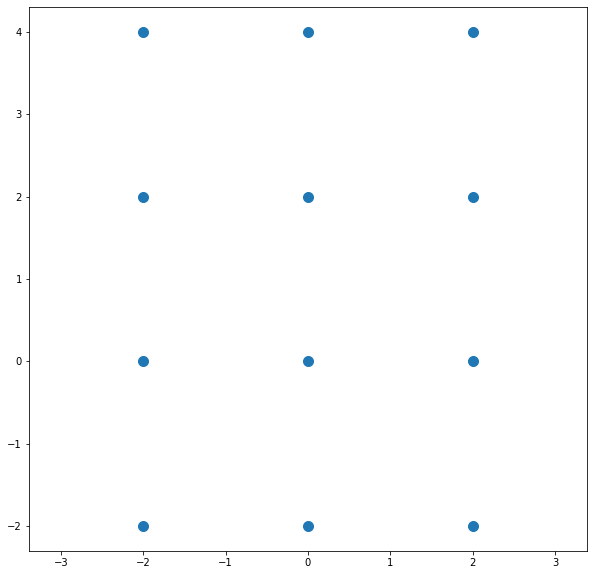

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)


data_in = [list(item) for item in lattice.points]
in_x = [v[0] for v in data_in]
in_y = [v[1] for v in data_in]

plt.scatter(in_x, in_y, s=100, label="in")
plt.axis('equal')


(-3.3, 3.3, -3.4, 5.4)

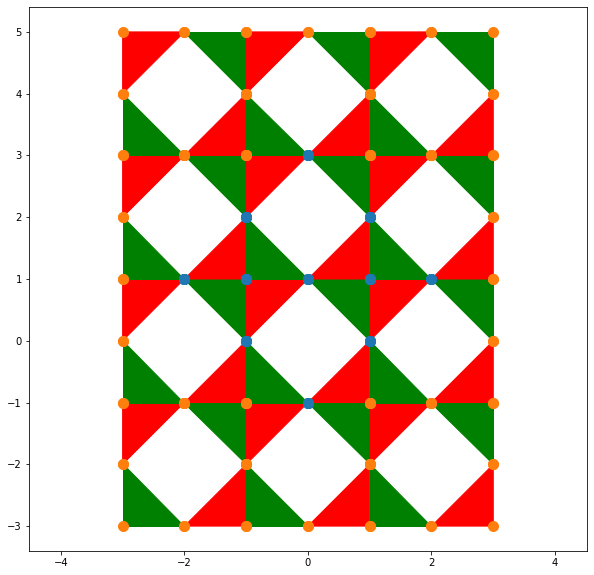

In [13]:
import numpy as np 
import matplotlib.pyplot as plt


stab = []
for face in tiling.faces:
    verts = []
    for vertex in face.vertices:
        verts.append(list(vertex.pos))
    pauli = qubit_data.operator[vertex.id].__str__()
    if pauli == 'X':
        stab.append([verts, 'red'])
    elif pauli == 'Z':
        stab.append([verts, 'green'])
    else:
        stab.append([verts, 'blue'])





fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

color = 'red'
for stabilizer in stab:
    ax.add_patch(plt.Polygon(stabilizer[0], color=stabilizer[1]))
data_in = [list(vertex.pos) for vertex in tiling.vertices if is_inside[vertex]]
in_x = [v[0] for v in data_in]
in_y = [v[1] for v in data_in]
data_out = [list(vertex.pos) for vertex in tiling.vertices if not is_inside[vertex]]
out_x = [v[0] for v in data_out]
out_y = [v[1] for v in data_out]
plt.scatter(in_x, in_y, s=100, label="in")
plt.scatter(out_x, out_y, s=100, label="out")
plt.axis('equal')



In [11]:
def view(shell, qubit_data: QubitData,
             figsize:Optional[Tuple[float, float]]=None,
             xcolor:str="red",
             zcolor:str="green",
             ycolor:str="blue")->None:
    """_summary_
    Only works at the moment for CSS codes
    Args:
        qubit_data (QubitData): _description_
        figsize (Optional[Tuple[float, float]], optional): _description_. Defaults to None.
        xcolor (str, optional): _description_. Defaults to "red".
        zcolor (str, optional): _description_. Defaults to "green".
        ycolor (str, optional): _description_. Defaults to "blue".
    """
    if figsize is None:
        figsize=(10,10)
    stab = []
    for face in shell.faces:
        verts = []
        for vertex in face.vertices:
            verts.append(list(vertex.pos))
        pauli = qubit_data.operator[face.vertices[0].id].__str__()
        if pauli == 'X':
            stab.append([verts, xcolor])
        elif pauli == 'Z':
            stab.append([verts, zcolor])
        else:
            stab.append([verts, ycolor])
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    for stabilizer in stab:
        ax.add_patch(plt.Polygon(stabilizer[0], color=stabilizer[1]))
    plt.axis('equal')


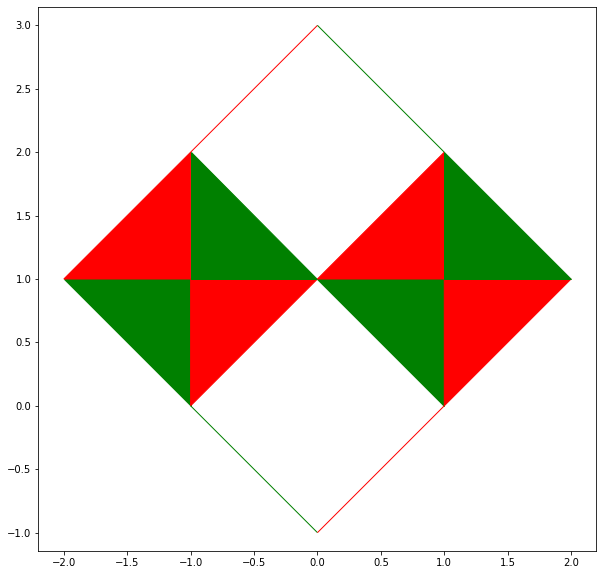

In [12]:
view(new_shell, new_qubit_data)



In [ ]:


stab = []
for face in new_shell.faces:
    verts = []
    for vertex in face.vertices:
        verts.append(list(vertex.pos))
    pauli = new_qubit_data.operator[face.vertices[0].id].__str__()
    if pauli == 'X':
        stab.append([verts, 'red'])
    elif pauli == 'Z':
        stab.append([verts, 'green'])
    else:
        stab.append([verts, 'blue'])

import numpy as np 

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

color = 'red'
for stabilizer in stab:
    ax.add_patch(plt.Polygon(stabilizer[0], color=stabilizer[1]))


plt.axis('equal')



In [13]:
def shell2symplectic(shell: Shell, qubit_count:QubitCount, qubit_data:QubitData, from_index:Optional[Dict[int,int]]):
    if from_index is None:
        from_index = [qubit_id for qubit_id, count in qubit_count.qubits_count.items() if count != 0]
        from_index = {index:qubit_id for index, qubit_id in enumerate(from_index)}

    print(from_index)
    for face in shell.faces:
        pauli_str = ''
        for vertex in face.vertices:
            pauli_str += qubit_data.operator[vertex.id] + str(qubit_data.qubit[vertex.id])
        print(pauli_str)


In [14]:
shell2symplectic(new_shell, qubit_count, qubit_data)

TypeError: shell2symplectic() missing 1 required positional argument: 'from_index'

In [12]:
def shell2symplectic(shell: Shell,
                     qubit_data:QubitData, 
                     qubit_count:QubitCount, 
                     from_index:Optional[Dict[int,int]]=None,
                     from_qubit:Optional[Dict[int,int]]=None)->PauliList:
    if from_index is None:
        from_index = [qubit_id for qubit_id, count in qubit_count.qubits_count.items() if count != 0]
        from_index = {index:qubit_id for index, qubit_id in enumerate(from_index)}
    if from_qubit is None:
        from_qubit = {qubit_id:index for index, qubit_id in from_index.items()}

    pauli_str_list = []
    for face in shell.faces:
        pauli_str = ''
        for vertex in face.vertices:
            pauli_str += qubit_data.operator[vertex.id].__str__() + str(from_qubit[qubit_data.qubit[vertex.id]])
        pauli_str_list.append(pauli_str)
    return PauliList(pauli_str_list)

In [13]:
p = shell2symplectic(new_shell, qubit_count, new_qubit_data)

In [14]:
p

PauliList(['IIIIIIIIZZZ', 'IIIIIIIXIXX', 'IIIIIXIIXXI', 'IIIZZZIIIII',
           'IIIIIIZIZII', 'IIIXIIXIIII', 'IIXIIIIXIII', 'IZZIIIIIIII',
           'IIIIIZIZIZI', 'IXIIXXIIIII', 'XIIXXIIIIII', 'ZZIIZIIIIII'])

In [19]:
qubit_data.orientation

{}

NameError: name 'is_inside_polygon' is not defined

In [9]:
a = float('inf')

In [10]:
a == float('inf')

True

In [11]:
1/0

ZeroDivisionError: division by zero

In [13]:
2**3

8